##PHAN THUC HANH TREN LOP

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
data_PATH = '/content/drive/MyDrive/DS201/LAB4/Lab_4_BL'

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory


In [4]:
Chest_XRay_IMG_SIZE=227
Chest_XRay_IMG_CHANEL=3
Chest_XRay_BATCH_SIZE=256
Chest_XRay_COLOR_MODE='rgd'


In [5]:
import os
Chest_XRay_PATH='/content/drive/MyDrive/DS201/Lab 4/ChestXray'
Chest_XRay_CLASSNAMES=sorted(os.listdir(Chest_XRay_PATH + '/train' ))

In [6]:
Chest_XRay_train_set= image_dataset_from_directory(
    directory=Chest_XRay_PATH + '/train',
    labels= 'inferred',
    label_mode= 'binary',
    class_names=Chest_XRay_CLASSNAMES,
    color_mode='rgb',
    batch_size=256, 
    image_size=(227,227),  
    interpolation= 'bilinear'
)

Found 5216 files belonging to 2 classes.


In [7]:
Chest_XRay_test_set= image_dataset_from_directory(
    directory=Chest_XRay_PATH + '/test',
    labels= 'inferred',
    label_mode= 'binary',
    class_names=Chest_XRay_CLASSNAMES,
    color_mode='rgb',
    batch_size=256, 
    image_size=(227,227),  
    interpolation= 'bilinear'
)

Found 624 files belonging to 2 classes.


In [8]:
Chest_XRay_val_set= image_dataset_from_directory(
    directory=Chest_XRay_PATH + '/val',
    labels= 'inferred',
    label_mode= 'binary',
    class_names=Chest_XRay_CLASSNAMES,
    color_mode='rgb',
    batch_size=256, 
    image_size=(227,227),  
    interpolation= 'bilinear'
)

Found 16 files belonging to 2 classes.


In [9]:
vegetable_IMG_SIZE=227
vegetable_IMG_CHANEL=3
vegetable_BATCH_SIZE=256
vegetable_COLOR_MODE='rgd'

In [10]:
import os
vegetable='/content/drive/MyDrive/DS201/Lab 4/Vegetable'
vegetable_CLASSNAMES=sorted(os.listdir(vegetable + '/train' ))

In [11]:
vegetable_train_set= image_dataset_from_directory(
    directory=vegetable + '/train',
    labels= 'inferred',
    label_mode= 'categorical',
    class_names=vegetable_CLASSNAMES,
    color_mode='rgb',
    batch_size=256, 
    image_size=(227,227),  
    interpolation= 'bilinear'
)

Found 15000 files belonging to 15 classes.


In [12]:
vegetable_test_set= image_dataset_from_directory(
    directory=vegetable + '/test',
    labels= 'inferred',
    label_mode= 'categorical',
    class_names=vegetable_CLASSNAMES,
    color_mode='rgb',
    batch_size=256, 
    image_size=(227,227),  
    interpolation= 'bilinear'
)

Found 3000 files belonging to 15 classes.


In [13]:
vegetable_val_set= image_dataset_from_directory(
    directory=vegetable + '/validation',
    labels= 'inferred',
    label_mode= 'categorical',
    class_names=vegetable_CLASSNAMES,
    color_mode='rgb',
    batch_size=256, 
    image_size=(227,227),  
    interpolation= 'bilinear'
)

Found 3000 files belonging to 15 classes.


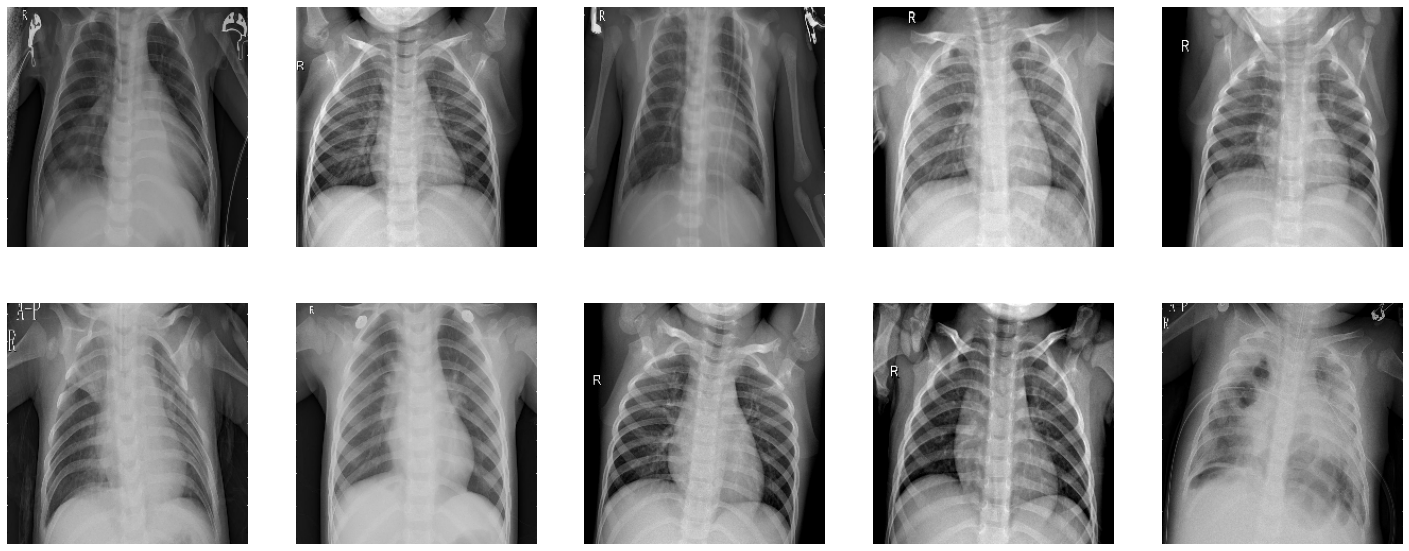

In [14]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(25,10))
for images, labels in Chest_XRay_train_set.take(1):
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(np.squeeze(images[i].numpy().astype('uint8')))
    plt.axis('off')

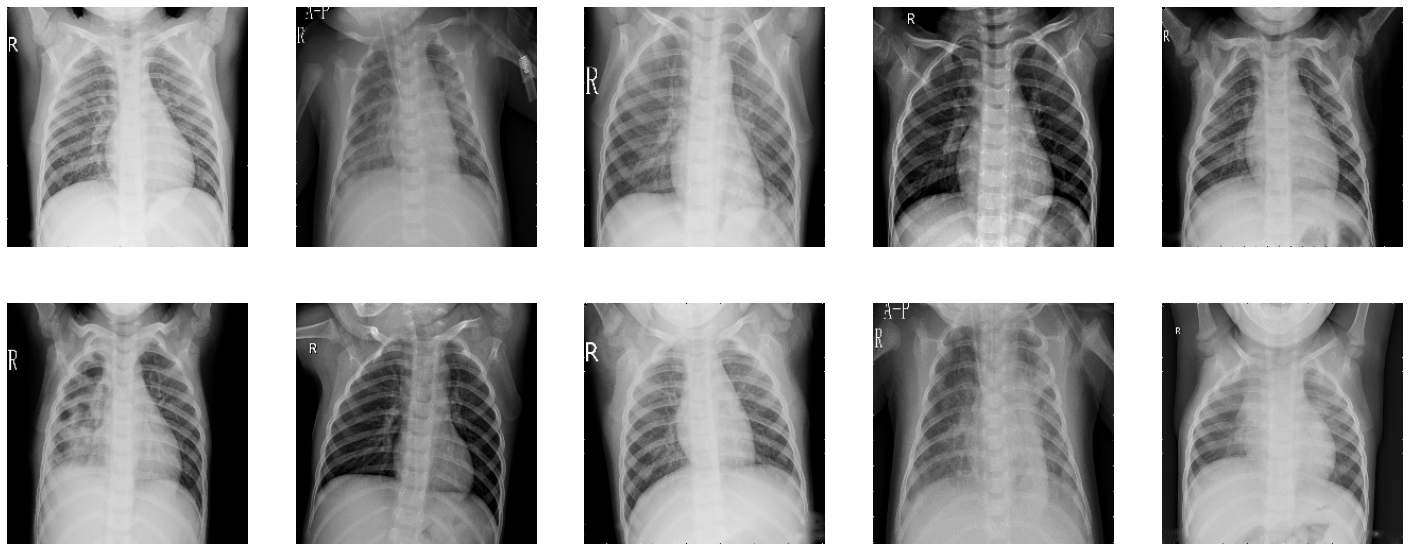

In [15]:
plt.figure(figsize=(25,10))
for images, labels in Chest_XRay_val_set.take(1):
  for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(np.squeeze(images[i].numpy().astype('uint8')))
    plt.axis('off')

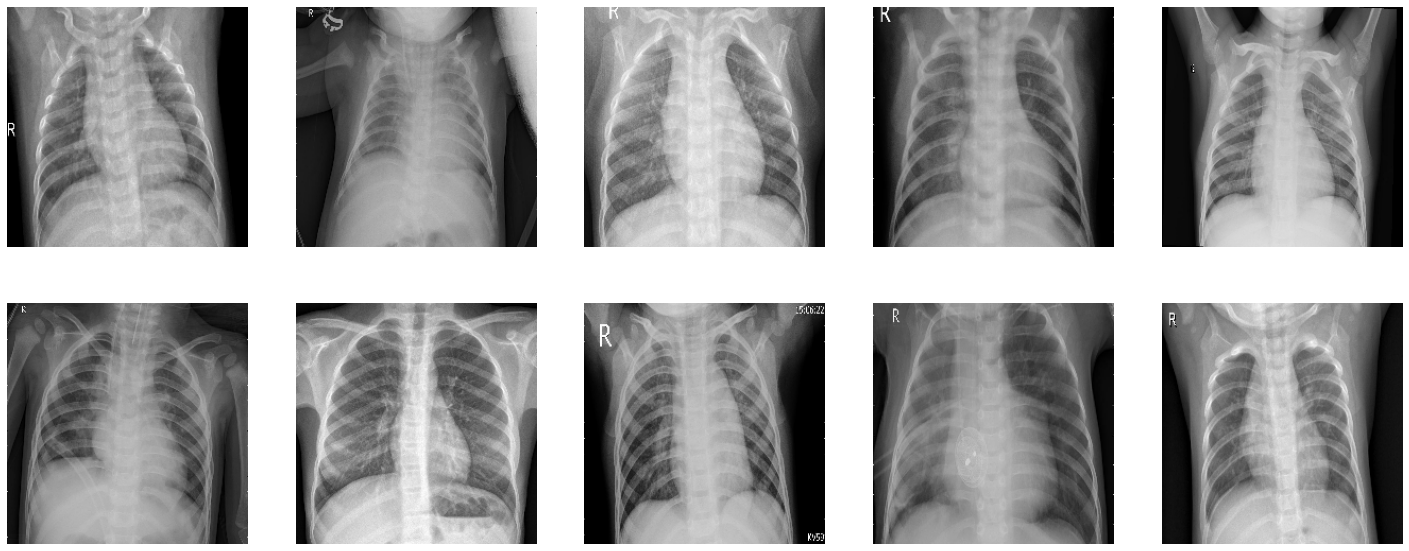

In [16]:
plt.figure(figsize=(25,10))
for images, labels in Chest_XRay_test_set.take(1):
  for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(np.squeeze(images[i].numpy().astype('uint8')))
    plt.axis('off')

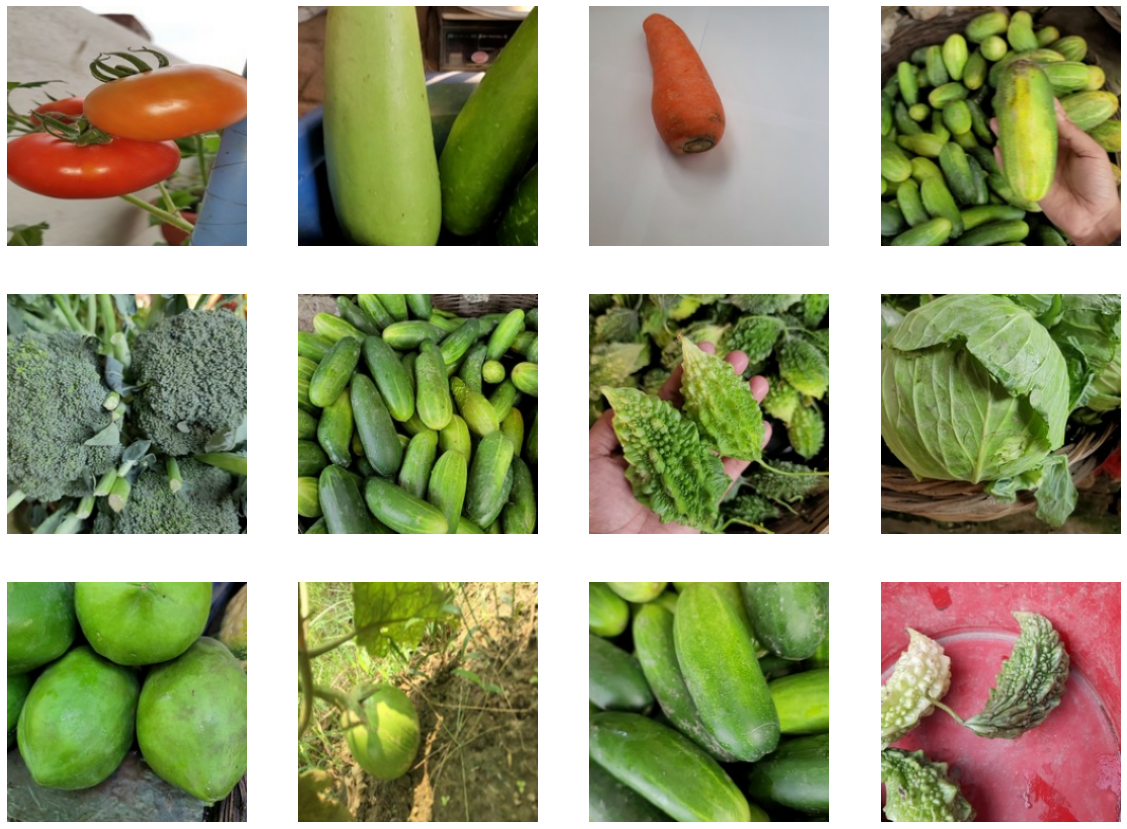

In [106]:
plt.figure(figsize=(20,15))
for images,labels in vegetable_train_set.take(1):
  for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(np.squeeze(images[i].numpy().astype('uint8')))
    plt.axis('off')

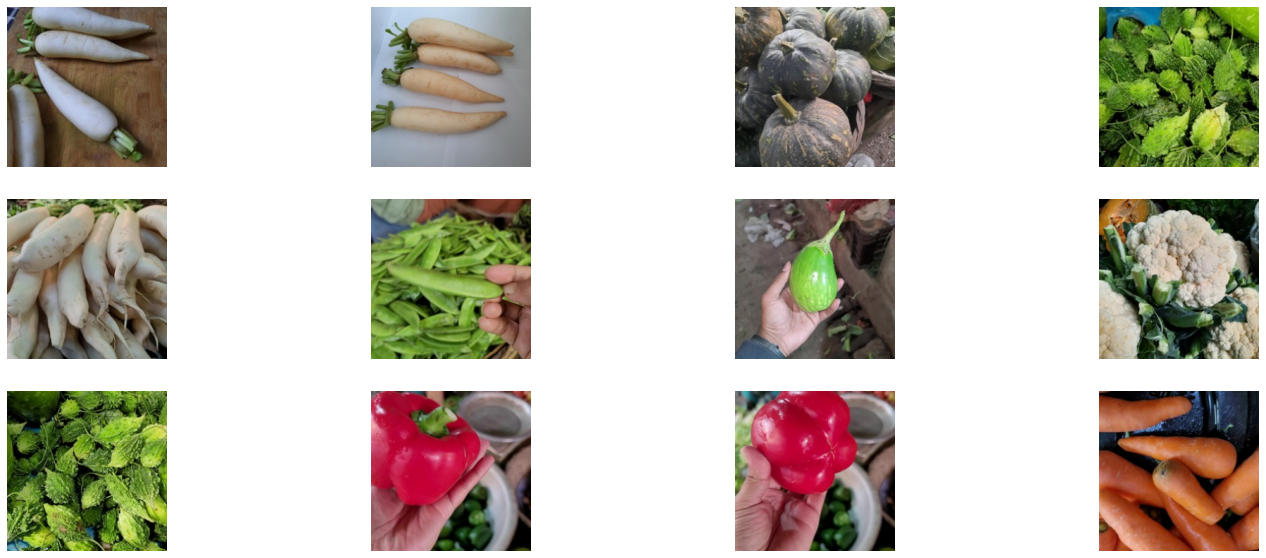

In [18]:
plt.figure(figsize=(25,10))
for images, labels in vegetable_val_set.take(1):
  for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(np.squeeze(images[i].numpy().astype('uint8')))
    plt.axis('off')

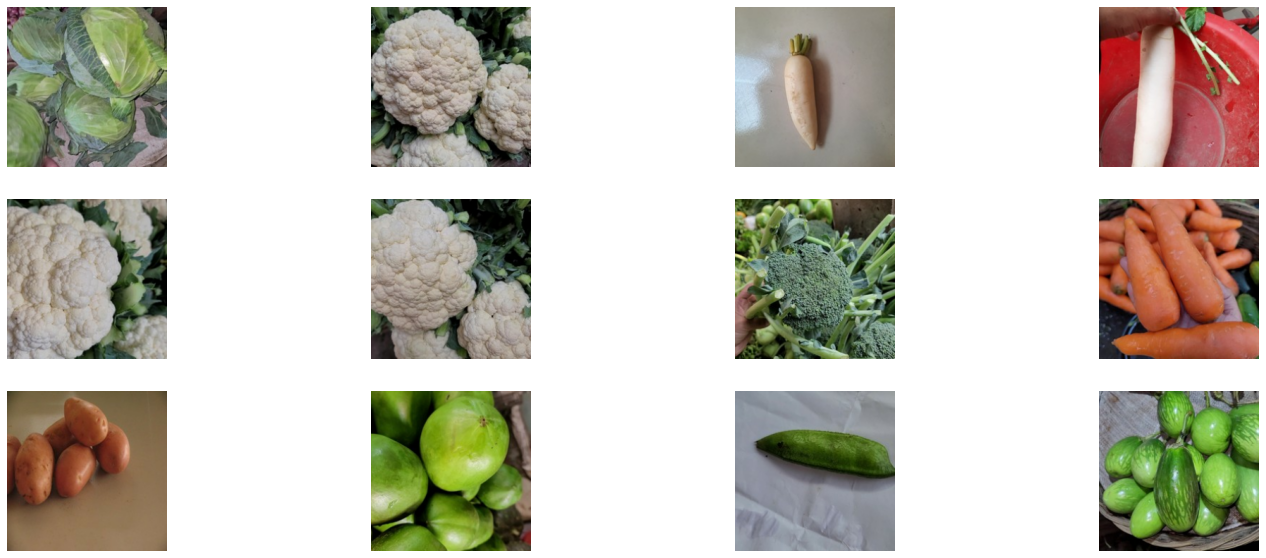

In [19]:
plt.figure(figsize=(25,10))
for images, labels in vegetable_test_set.take(1):
  for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(np.squeeze(images[i].numpy().astype('uint8')))
    plt.axis('off')

##UNG DUNG MO HINH

In [20]:
from keras.applications.vgg16 import VGG16

vgg= VGG16(include_top= False, input_shape = (227,227,3))

In [21]:
for layer in vgg.layers:
 layer.trainable = False

In [22]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
flat = Flatten()(vgg.layers[-1].output)
fc1 = Dense(1024, activation = 'relu')(flat)
output = Dense(1, activation = 'sigmoid')(fc1)
model_3 = Model(inputs = vgg.inputs, outputs = output)


In [24]:
model_3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 227, 227, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 227, 227, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 113, 113, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 113, 113, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 113, 113, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [25]:
#for layer in vgg.layers:
 #layer.trainable = True

In [26]:
#vgg.summary()

In [27]:
model_3.compile(optimizer=Adam(),loss = BinaryCrossentropy(), metrics=['accuracy'])

In [28]:
history_3= model_3.fit(Chest_XRay_train_set, epochs=5 , validation_data = Chest_XRay_val_set,callbacks = EarlyStopping(monitor='val_loss', patience=2))

Epoch 1/5
21/21 [==============================] - 95s 2s/step - loss: 33.1261 - accuracy: 0.7822 - val_loss: 0.4581 - val_accuracy: 0.9375
Epoch 2/5
21/21 [==============================] - 65s 2s/step - loss: 0.5767 - accuracy: 0.9419 - val_loss: 0.0196 - val_accuracy: 1.0000
Epoch 3/5
21/21 [==============================] - 63s 2s/step - loss: 0.1075 - accuracy: 0.9718 - val_loss: 0.0777 - val_accuracy: 1.0000
Epoch 4/5
21/21 [==============================] - 59s 2s/step - loss: 0.0559 - accuracy: 0.9824 - val_loss: 0.5631 - val_accuracy: 0.7500


In [29]:
y_pred_total = []
y_true = []

for img, label in Chest_XRay_test_set:
 y_pred = model_3.predict(img)
 y_pred_total += [1 if i > 0.5 else 0 for i in y_pred]
 y_true += np.array(label).flatten().tolist()

4/4 [==============================] - 1s 164ms/step


In [30]:
for i in range(len(y_true)):
  if y_pred_total[i] != y_true[i]:
    print(i,'(',y_true[i],') - ',y_pred_total[i])

2 ( 0.0 ) -  1
13 ( 0.0 ) -  1
16 ( 0.0 ) -  1
25 ( 0.0 ) -  1
26 ( 0.0 ) -  1
33 ( 0.0 ) -  1
37 ( 0.0 ) -  1
45 ( 0.0 ) -  1
54 ( 0.0 ) -  1
58 ( 0.0 ) -  1
59 ( 0.0 ) -  1
63 ( 0.0 ) -  1
67 ( 0.0 ) -  1
70 ( 0.0 ) -  1
86 ( 0.0 ) -  1
91 ( 0.0 ) -  1
94 ( 0.0 ) -  1
113 ( 0.0 ) -  1
114 ( 0.0 ) -  1
123 ( 0.0 ) -  1
124 ( 0.0 ) -  1
127 ( 0.0 ) -  1
128 ( 0.0 ) -  1
142 ( 0.0 ) -  1
144 ( 0.0 ) -  1
146 ( 0.0 ) -  1
150 ( 0.0 ) -  1
151 ( 0.0 ) -  1
155 ( 0.0 ) -  1
156 ( 0.0 ) -  1
158 ( 0.0 ) -  1
159 ( 0.0 ) -  1
164 ( 0.0 ) -  1
171 ( 0.0 ) -  1
174 ( 0.0 ) -  1
177 ( 0.0 ) -  1
181 ( 0.0 ) -  1
192 ( 0.0 ) -  1
194 ( 0.0 ) -  1
196 ( 0.0 ) -  1
198 ( 0.0 ) -  1
219 ( 0.0 ) -  1
227 ( 0.0 ) -  1
229 ( 0.0 ) -  1
231 ( 0.0 ) -  1
233 ( 0.0 ) -  1
239 ( 0.0 ) -  1
259 ( 0.0 ) -  1
260 ( 0.0 ) -  1
271 ( 0.0 ) -  1
275 ( 0.0 ) -  1
282 ( 0.0 ) -  1
284 ( 0.0 ) -  1
288 ( 0.0 ) -  1
305 ( 0.0 ) -  1
319 ( 0.0 ) -  1
321 ( 0.0 ) -  1
324 ( 0.0 ) -  1
340 ( 0.0 ) -  1
344 ( 0.0 ) -  

In [31]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [32]:
print('Accuracy: ',accuracy_score(y_pred_total, y_true)*100)

Accuracy:  80.12820512820514


In [33]:
print('F1_score : ',f1_score(y_pred_total, y_true)*100)

F1_score :  86.28318584070797


In [34]:
print('Precision :', precision_score(y_pred_total, y_true)*100)

Precision : 100.0


In [35]:
print('Recall', recall_score(y_pred_total, y_true)*100)

Recall 75.87548638132296


##VEGATABLE

In [36]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
from keras.applications.vgg16 import VGG16

vgg = VGG16(include_top = False, input_shape = (227, 227, 3))

In [38]:
# Freeze previous layers
for layer in vgg.layers:
  layer.trainable = False

In [39]:
flat = Flatten()(vgg.layers[-1].output)
fc1 = Dense(1024, activation = 'relu')(flat)
output = Dense(15, activation = 'softmax')(fc1) 
model_4 = Model(inputs = vgg.inputs, outputs = output)

In [40]:
model_4.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 227, 227, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 227, 227, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 113, 113, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 113, 113, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 113, 113, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [41]:
model_4.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [42]:
history_4 = model_4.fit(vegetable_train_set, epochs = 5, validation_data=vegetable_val_set,callbacks = EarlyStopping(monitor='val_loss', patience=2))

Epoch 1/5
59/59 [==============================] - 154s 2s/step - loss: 17.9747 - accuracy: 0.8797 - val_loss: 0.1635 - val_accuracy: 0.9937
Epoch 2/5
59/59 [==============================] - 118s 2s/step - loss: 0.0418 - accuracy: 0.9975 - val_loss: 0.0939 - val_accuracy: 0.9963
Epoch 3/5
59/59 [==============================] - 118s 2s/step - loss: 0.0036 - accuracy: 0.9995 - val_loss: 0.1446 - val_accuracy: 0.9953
Epoch 4/5
59/59 [==============================] - 117s 2s/step - loss: 0.0077 - accuracy: 0.9993 - val_loss: 0.0897 - val_accuracy: 0.9977
Epoch 5/5
59/59 [==============================] - 117s 2s/step - loss: 0.0051 - accuracy: 0.9992 - val_loss: 0.0776 - val_accuracy: 0.9980


In [43]:
y_pred_total = []
y_true = []

for img, label in vegetable_test_set:
  y_pred = model_4.predict(img)
  y_pred_total += np.argmax(y_pred, axis=-1).tolist()
  y_true += np.array(np.argmax(label, axis=-1)).flatten().tolist()

6/6 [==============================] - 4s 676ms/step


In [44]:
for i in range(len(y_true)):
  if y_pred_total[i] != y_true[i]:
    print(i, ' (', y_true[i], ') - ', y_pred_total[i])

651  ( 4 ) -  0
919  ( 5 ) -  8
1213  ( 3 ) -  12
1928  ( 8 ) -  5
2122  ( 1 ) -  12
2871  ( 3 ) -  10


In [45]:
print('Accuracy: ',accuracy_score(y_pred_total, y_true)*100)

Accuracy:  99.8


In [46]:
print('F1_score : ',f1_score(y_pred_total, y_true, average="macro")*100)

F1_score :  99.7999979166224


In [47]:
print('Precision :', precision_score(y_pred_total, y_true,average="macro")*100)

Precision : 99.8


In [48]:
print('Recall', recall_score(y_pred_total, y_true,average="macro")*100)

Recall 99.80099174096515


##JEWELLERY

In [49]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

JL_IMG_SIZE = 277
JL_IMG_CHANEL = 3
JL_BATCH_SIZE = 256
JL_COLOR_MODE = 'rgb'


In [50]:
import os
JL_PATH='/content/drive/MyDrive/DS201/Lab 4/Jewellery'
JL_CLASSNAMES = sorted(os.listdir(JL_PATH + '/training'))

In [51]:
JL_train_set = image_dataset_from_directory(
    directory = JL_PATH + '/training',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = JL_CLASSNAMES,
    color_mode = 'rgb',
    batch_size = 256,
    image_size = (227, 227),
    interpolation = 'bilinear',
)

Found 1566 files belonging to 5 classes.


In [52]:
JL_dev_set = image_dataset_from_directory(
    directory = JL_PATH + '/training',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = JL_CLASSNAMES,
    color_mode = 'rgb',
    batch_size = 256,
    image_size = (227, 227),
    interpolation = 'bilinear',
    subset="validation",
    seed=1,
    validation_split=0.1
    
)

Found 1566 files belonging to 5 classes.
Using 156 files for validation.


In [53]:
JL_test_set = image_dataset_from_directory(
    directory = JL_PATH + '/test',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = JL_CLASSNAMES,
    color_mode = 'rgb',
    batch_size = 256,
    image_size = (227, 227),
    interpolation = 'bilinear'
)

Found 250 files belonging to 5 classes.


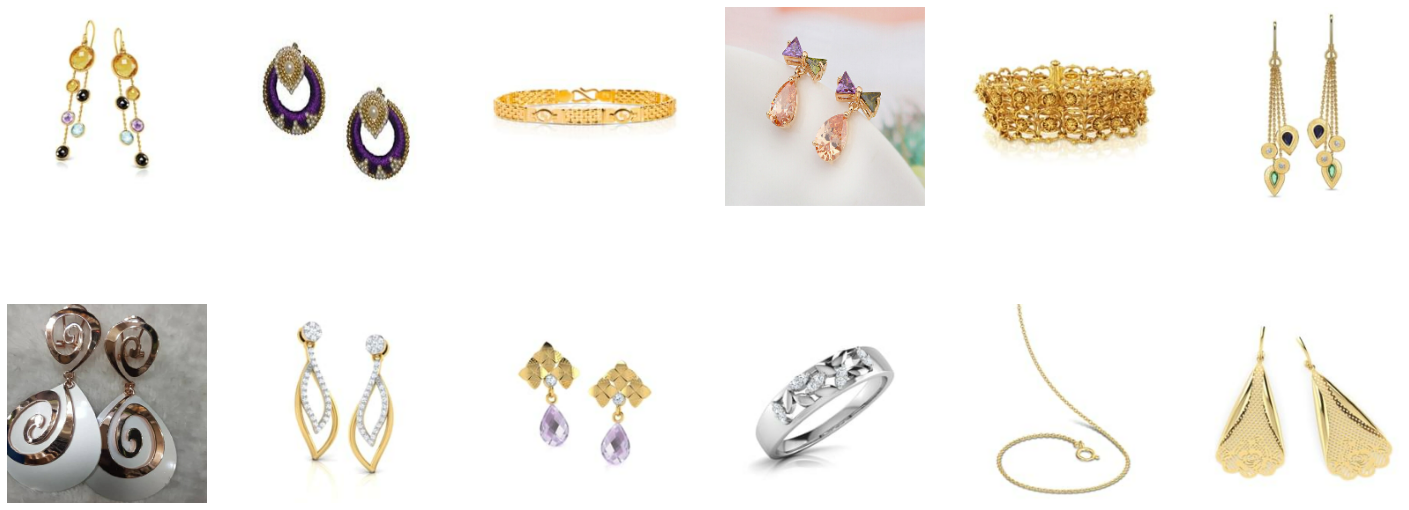

In [54]:
plt.figure(figsize=(25,10))
for images, labels in JL_train_set.take(1):
  for i in range(12):
    plt.subplot(2, 6, i+1)
    plt.imshow(np.squeeze(images[i].numpy().astype('uint8')))
    plt.axis('off')

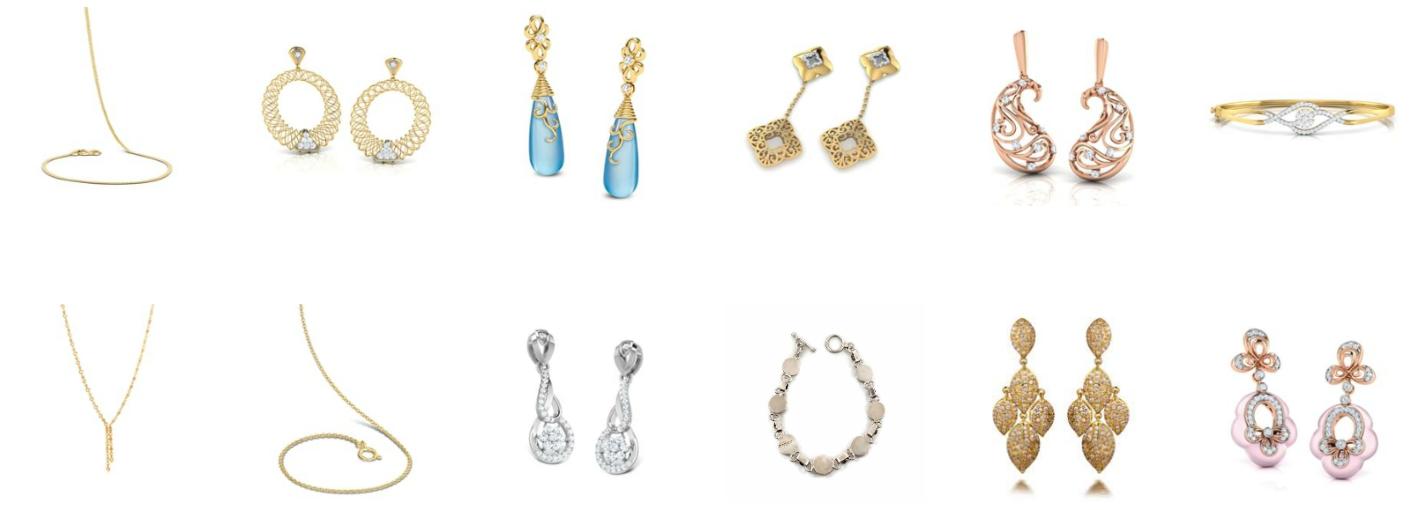

In [55]:
plt.figure(figsize=(25,10))
for images, labels in JL_dev_set.take(1):
  for i in range(12):
    plt.subplot(2, 6, i+1)
    plt.imshow(np.squeeze(images[i].numpy().astype('uint8')))
    plt.axis('off')

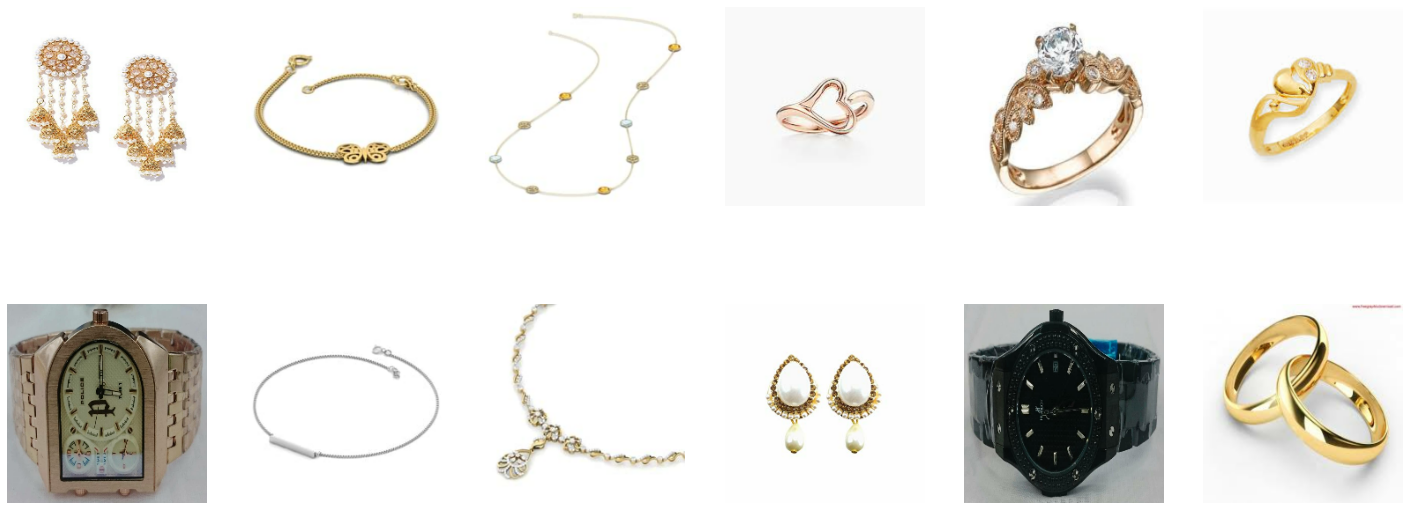

In [56]:
plt.figure(figsize=(25,10))
for images, labels in JL_test_set.take(1):
  for i in range(12):
    plt.subplot(2, 6, i+1)
    plt.imshow(np.squeeze(images[i].numpy().astype('uint8')))
    plt.axis('off')

In [57]:
from keras.applications.vgg16 import VGG16
vgg = VGG16(include_top = False, input_shape = (227, 227, 3))

In [58]:
for layer in vgg.layers:
  layer.trainable = False

In [59]:
flat = Flatten()(vgg.layers[-1].output)
fc1 = Dense(1024, activation = 'relu')(flat)
output = Dense(5, activation = 'softmax')(fc1) 
model_5 = Model(inputs = vgg.inputs, outputs = output)

In [60]:
model_5.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 227, 227, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 227, 227, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 113, 113, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 113, 113, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 113, 113, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [61]:
model_5.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [62]:
history_5 = model_5.fit(JL_train_set,epochs = 5, validation_data=JL_dev_set,callbacks = EarlyStopping(monitor='val_loss', patience=2))

Epoch 1/5
7/7 [==============================] - 32s 4s/step - loss: 10.0765 - accuracy: 0.8091 - val_loss: 0.0107 - val_accuracy: 0.9936
Epoch 2/5
7/7 [==============================] - 15s 1s/step - loss: 0.7493 - accuracy: 0.9917 - val_loss: 0.6375 - val_accuracy: 0.9936
Epoch 3/5
7/7 [==============================] - 14s 1s/step - loss: 0.1263 - accuracy: 0.9968 - val_loss: 7.6416e-10 - val_accuracy: 1.0000
Epoch 4/5
7/7 [==============================] - 15s 1s/step - loss: 0.0655 - accuracy: 0.9974 - val_loss: 0.1009 - val_accuracy: 0.9872
Epoch 5/5
7/7 [==============================] - 14s 1s/step - loss: 0.0165 - accuracy: 0.9974 - val_loss: 0.0817 - val_accuracy: 0.9936


In [63]:
y_pred_total = []
y_true = []

for img, label in JL_test_set:
  y_pred = model_5.predict(img)
  y_pred_total += np.argmax(y_pred, axis=-1).tolist()
  y_true += np.array(np.argmax(label, axis=-1)).flatten().tolist()

8/8 [==============================] - 4s 552ms/step


In [64]:
for i in range(len(y_true)):
  if y_pred_total[i] != y_true[i]:
    print(i, ' (', y_true[i], ') - ', y_pred_total[i])

9  ( 4 ) -  3
14  ( 2 ) -  0
25  ( 2 ) -  0
36  ( 2 ) -  0
41  ( 2 ) -  0
68  ( 3 ) -  0
70  ( 3 ) -  0
74  ( 3 ) -  1
81  ( 3 ) -  1
87  ( 1 ) -  0
108  ( 2 ) -  0
115  ( 2 ) -  1
128  ( 2 ) -  0
131  ( 2 ) -  0
134  ( 3 ) -  0
141  ( 3 ) -  0
188  ( 3 ) -  1
232  ( 2 ) -  0
241  ( 2 ) -  0


In [65]:
print('Accuracy: ',accuracy_score(y_pred_total, y_true)*100)

Accuracy:  92.4


In [66]:
print("f1_score: ", f1_score(y_pred_total, y_true, average="macro")*100)

f1_score:  92.44661577889815


In [67]:
print("precision: ", precision_score(y_pred_total, y_true, average="macro")*100)

precision:  92.4


In [68]:
print("recall: ", recall_score(y_pred_total, y_true, average="macro")*100)

recall:  93.6610205831904


##BAI TAP THUC HANH

##CAU 1:

VGG-19

In [69]:
from keras.applications.vgg19 import VGG19
vgg = VGG16(include_top = False, input_shape = (227, 227, 3))

In [70]:
for layer in vgg.layers:
  layer.trainable = False

In [71]:
flat = Flatten()(vgg.layers[-1].output)
fc1 = Dense(1024, activation = 'relu')(flat)
output = Dense(1, activation = 'sigmoid')(fc1)
model_6 = Model(inputs = vgg.inputs, outputs = output)

In [72]:
model_6.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 227, 227, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 227, 227, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 113, 113, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 113, 113, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 113, 113, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [73]:
model_6.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])

In [74]:
history_6 = model_6.fit(Chest_XRay_train_set,epochs = 5,validation_data=Chest_XRay_val_set,callbacks = EarlyStopping(monitor='val_loss', patience=2))

Epoch 1/5
21/21 [==============================] - 56s 2s/step - loss: 35.4264 - accuracy: 0.7709 - val_loss: 2.4234 - val_accuracy: 0.7500
Epoch 2/5
21/21 [==============================] - 54s 2s/step - loss: 0.4051 - accuracy: 0.9480 - val_loss: 0.1585 - val_accuracy: 0.9375
Epoch 3/5
21/21 [==============================] - 52s 2s/step - loss: 0.0672 - accuracy: 0.9789 - val_loss: 0.0539 - val_accuracy: 1.0000
Epoch 4/5
21/21 [==============================] - 53s 2s/step - loss: 0.0297 - accuracy: 0.9885 - val_loss: 0.0307 - val_accuracy: 1.0000
Epoch 5/5
21/21 [==============================] - 54s 2s/step - loss: 0.0192 - accuracy: 0.9942 - val_loss: 0.0277 - val_accuracy: 1.0000


In [75]:
y_pred_total = []
y_true = []

for img, label in Chest_XRay_test_set:
  y_pred = model_6.predict(img)
  y_pred_total += [1 if i > 0.5 else 0 for i in y_pred]
  y_true += np.array(label).flatten().tolist()

4/4 [==============================] - 1s 161ms/step


In [76]:
for i in range(len(y_true)):
  if y_pred_total[i] != y_true[i]:
    print(i, ' (', y_true[i], ') - ', y_pred_total[i])

5  ( 0.0 ) -  1
7  ( 0.0 ) -  1
11  ( 0.0 ) -  1
26  ( 0.0 ) -  1
31  ( 0.0 ) -  1
37  ( 0.0 ) -  1
48  ( 0.0 ) -  1
50  ( 0.0 ) -  1
51  ( 0.0 ) -  1
59  ( 0.0 ) -  1
70  ( 0.0 ) -  1
71  ( 0.0 ) -  1
73  ( 0.0 ) -  1
91  ( 0.0 ) -  1
96  ( 0.0 ) -  1
113  ( 0.0 ) -  1
114  ( 0.0 ) -  1
117  ( 0.0 ) -  1
120  ( 0.0 ) -  1
138  ( 0.0 ) -  1
149  ( 0.0 ) -  1
161  ( 0.0 ) -  1
167  ( 0.0 ) -  1
170  ( 0.0 ) -  1
182  ( 0.0 ) -  1
183  ( 0.0 ) -  1
184  ( 0.0 ) -  1
187  ( 0.0 ) -  1
189  ( 0.0 ) -  1
192  ( 0.0 ) -  1
197  ( 0.0 ) -  1
199  ( 0.0 ) -  1
200  ( 0.0 ) -  1
202  ( 0.0 ) -  1
205  ( 0.0 ) -  1
208  ( 0.0 ) -  1
215  ( 0.0 ) -  1
222  ( 0.0 ) -  1
224  ( 0.0 ) -  1
232  ( 0.0 ) -  1
253  ( 0.0 ) -  1
265  ( 0.0 ) -  1
276  ( 0.0 ) -  1
277  ( 0.0 ) -  1
280  ( 0.0 ) -  1
281  ( 0.0 ) -  1
285  ( 0.0 ) -  1
286  ( 0.0 ) -  1
289  ( 0.0 ) -  1
303  ( 0.0 ) -  1
307  ( 0.0 ) -  1
308  ( 0.0 ) -  1
316  ( 0.0 ) -  1
322  ( 0.0 ) -  1
330  ( 0.0 ) -  1
334  ( 0.0 ) -  1
335  ( 0.

In [77]:
print("Mô hình VGG-19 ")

print("Accuracy: ", accuracy_score(y_pred_total, y_true)*100)
print("F1_score: ", f1_score(y_pred_total, y_true)*100)
print("Precision: ", precision_score(y_pred_total, y_true)*100)
print("Recall: ", recall_score(y_pred_total, y_true)*100)

Mô hình VGG-19 
Accuracy:  80.92948717948718
F1_score:  86.76307007786428
Precision:  100.0
Recall:  76.62082514734774


RESNET-50

In [78]:
from tensorflow.keras.applications.resnet50 import ResNet50
resnet = ResNet50(include_top = False, input_shape = (227, 227, 3))

In [79]:
for layer in resnet.layers:
  layer.trainable = False

In [80]:
flat = Flatten()(resnet.layers[-1].output)
fc1 = Dense(1024, activation = 'relu')(flat)
output = Dense(1, activation = 'sigmoid')(fc1)

model_7 = Model(inputs = resnet.inputs, outputs = output)

In [81]:
model_7.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 227, 227, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 233, 233, 3)  0           ['input_5[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 114, 114, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [82]:
model_7.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])

In [83]:
history_7 = model_7.fit(Chest_XRay_train_set,epochs = 5,validation_data=Chest_XRay_val_set,callbacks = EarlyStopping(monitor='val_loss', patience=2))

Epoch 1/5
21/21 [==============================] - 58s 2s/step - loss: 8.9229 - accuracy: 0.9170 - val_loss: 6.4740 - val_accuracy: 0.7500
Epoch 2/5
21/21 [==============================] - 46s 2s/step - loss: 0.4944 - accuracy: 0.9835 - val_loss: 8.0130e-09 - val_accuracy: 1.0000
Epoch 3/5
21/21 [==============================] - 45s 2s/step - loss: 0.0740 - accuracy: 0.9954 - val_loss: 5.3355e-08 - val_accuracy: 1.0000
Epoch 4/5
21/21 [==============================] - 44s 2s/step - loss: 0.0145 - accuracy: 0.9987 - val_loss: 1.5877e-07 - val_accuracy: 1.0000


In [84]:
y_pred_total = []
y_true = []

for img, label in Chest_XRay_test_set:
  y_pred = model_7.predict(img)
  y_pred_total += [1 if i > 0.5 else 0 for i in y_pred]
  y_true += np.array(label).flatten().tolist()

4/4 [==============================] - 1s 108ms/step


In [85]:
for i in range(len(y_true)):
  if y_pred_total[i] != y_true[i]:
    print(i, ' (', y_true[i], ') - ', y_pred_total[i])

0  ( 0.0 ) -  1
15  ( 0.0 ) -  1
23  ( 0.0 ) -  1
25  ( 0.0 ) -  1
29  ( 0.0 ) -  1
30  ( 0.0 ) -  1
31  ( 0.0 ) -  1
37  ( 0.0 ) -  1
39  ( 0.0 ) -  1
43  ( 0.0 ) -  1
47  ( 0.0 ) -  1
50  ( 0.0 ) -  1
57  ( 0.0 ) -  1
63  ( 0.0 ) -  1
64  ( 0.0 ) -  1
71  ( 0.0 ) -  1
73  ( 0.0 ) -  1
88  ( 0.0 ) -  1
90  ( 0.0 ) -  1
92  ( 0.0 ) -  1
98  ( 0.0 ) -  1
110  ( 0.0 ) -  1
111  ( 0.0 ) -  1
113  ( 0.0 ) -  1
115  ( 0.0 ) -  1
116  ( 0.0 ) -  1
119  ( 0.0 ) -  1
121  ( 0.0 ) -  1
123  ( 0.0 ) -  1
125  ( 0.0 ) -  1
126  ( 0.0 ) -  1
134  ( 0.0 ) -  1
140  ( 0.0 ) -  1
150  ( 0.0 ) -  1
155  ( 0.0 ) -  1
159  ( 0.0 ) -  1
164  ( 0.0 ) -  1
169  ( 0.0 ) -  1
170  ( 0.0 ) -  1
181  ( 0.0 ) -  1
183  ( 0.0 ) -  1
186  ( 0.0 ) -  1
190  ( 0.0 ) -  1
198  ( 0.0 ) -  1
210  ( 0.0 ) -  1
211  ( 0.0 ) -  1
212  ( 0.0 ) -  1
220  ( 0.0 ) -  1
226  ( 0.0 ) -  1
229  ( 0.0 ) -  1
235  ( 0.0 ) -  1
237  ( 0.0 ) -  1
238  ( 0.0 ) -  1
255  ( 0.0 ) -  1
257  ( 0.0 ) -  1
267  ( 0.0 ) -  1
282  ( 0.0 ) -

In [86]:
print("Mô hình ResNet50")

print("Accuracy: ", accuracy_score(y_pred_total, y_true)*100)
print("F1_score: ", f1_score(y_pred_total, y_true)*100)
print("Precision: ", precision_score(y_pred_total, y_true)*100)
print("Recall: ", recall_score(y_pred_total, y_true)*100)

Mô hình ResNet50
Accuracy:  78.68589743589743
F1_score:  85.4006586169045
Precision:  99.74358974358975
Recall:  74.6641074856046


NX: Ở bộ dữ liệu Chest X-Ray với 2 nhãn thì ta có thể thấy cả hai mô hình cho kết quả tương đối tốt nằm ở khoảng 78% - 80% đối với Accuracy và 85% - 86% đối với F1_score

##CAU 3

VGG-19

In [87]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping

In [88]:
from keras.applications.vgg19 import VGG19
vgg = VGG19(include_top = False, input_shape = (227, 227, 3))

In [89]:
for layer in vgg.layers:
  layer.trainable = False

In [90]:
flat = Flatten()(vgg.layers[-1].output)
fc1 = Dense(1024, activation = 'relu')(flat)
output = Dense(5, activation = 'softmax')(fc1) 
model_8 = Model(inputs = vgg.inputs, outputs = output)

In [91]:
model_8.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 227, 227, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 227, 227, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 113, 113, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 113, 113, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 113, 113, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [92]:
model_8.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [93]:
history_8 = model_8.fit(JL_train_set,
                    epochs = 5,
                    validation_data= JL_dev_set,
                    callbacks = EarlyStopping(monitor='val_loss', patience=2))

Epoch 1/5
7/7 [==============================] - 17s 2s/step - loss: 70.6046 - accuracy: 0.6028 - val_loss: 4.6739 - val_accuracy: 0.9423
Epoch 2/5
7/7 [==============================] - 16s 2s/step - loss: 4.3042 - accuracy: 0.9630 - val_loss: 5.4607 - val_accuracy: 0.9423
Epoch 3/5
7/7 [==============================] - 16s 2s/step - loss: 3.1401 - accuracy: 0.9585 - val_loss: 1.6702 - val_accuracy: 0.9744
Epoch 4/5
7/7 [==============================] - 16s 2s/step - loss: 0.7542 - accuracy: 0.9891 - val_loss: 0.3152 - val_accuracy: 0.9936
Epoch 5/5
7/7 [==============================] - 16s 2s/step - loss: 0.2248 - accuracy: 0.9949 - val_loss: 0.0044 - val_accuracy: 1.0000


In [94]:
y_pred_total = []
y_true = []

for img, label in JL_test_set:
  y_pred = model_8.predict(img)
  y_pred_total += np.argmax(y_pred, axis=-1).tolist()
  y_true += np.array(np.argmax(label, axis=-1)).flatten().tolist()

8/8 [==============================] - 2s 199ms/step


In [95]:
for i in range(len(y_true)):
  if y_pred_total[i] != y_true[i]:
    print(i, ' (', y_true[i], ') - ', y_pred_total[i])

6  ( 3 ) -  2
41  ( 2 ) -  0
43  ( 2 ) -  0
55  ( 2 ) -  0
60  ( 2 ) -  0
78  ( 2 ) -  0
110  ( 3 ) -  1
122  ( 2 ) -  0
127  ( 2 ) -  0
150  ( 2 ) -  0
178  ( 2 ) -  0
217  ( 2 ) -  0
229  ( 1 ) -  2
230  ( 4 ) -  3


In [96]:
print("Mô hình VGG19 ")

print("Accuracy: ", accuracy_score(y_pred_total, y_true)*100)
print("F1_score: ", f1_score(y_pred_total, y_true, average="macro")*100)
print("Precision: ", precision_score(y_pred_total, y_true, average="macro")*100)
print("Recall: ", recall_score(y_pred_total, y_true, average="macro")*100)

Mô hình VGG19 
Accuracy:  94.39999999999999
F1_score:  94.36504172156346
Precision:  94.40000000000002
Recall:  94.9061224489796


RESNET50

In [97]:
from tensorflow.keras.applications.resnet50 import ResNet50
resnet = ResNet50(include_top = False, input_shape = (227, 227, 3))

In [98]:
for layer in resnet.layers:
  layer.trainable = False

In [99]:
flat = Flatten()(resnet.layers[-1].output)
fc1 = Dense(1024, activation = 'relu')(flat)
output = Dense(5, activation = 'softmax')(fc1) 
model_9 = Model(inputs = resnet.inputs, outputs = output)

In [100]:
model_9.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 227, 227, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 233, 233, 3)  0           ['input_7[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 114, 114, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [101]:
model_9.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [102]:
history_9 = model_9.fit(JL_train_set,epochs = 5, validation_data=JL_dev_set,callbacks = EarlyStopping(monitor='val_loss', patience=2))

Epoch 1/5
7/7 [==============================] - 20s 2s/step - loss: 51.2724 - accuracy: 0.5632 - val_loss: 12.3075 - val_accuracy: 0.8910
Epoch 2/5
7/7 [==============================] - 11s 1s/step - loss: 4.7814 - accuracy: 0.9502 - val_loss: 0.8873 - val_accuracy: 0.9808
Epoch 3/5
7/7 [==============================] - 11s 1s/step - loss: 2.7683 - accuracy: 0.9681 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/5
7/7 [==============================] - 11s 1s/step - loss: 0.6597 - accuracy: 0.9917 - val_loss: 0.4175 - val_accuracy: 0.9872
Epoch 5/5
7/7 [==============================] - 12s 1s/step - loss: 0.3729 - accuracy: 0.9923 - val_loss: 0.0437 - val_accuracy: 0.9936


In [103]:
y_pred_total = []
y_true = []

for img, label in JL_test_set:
  y_pred = model_9.predict(img)
  y_pred_total += np.argmax(y_pred, axis=-1).tolist()
  y_true += np.array(np.argmax(label, axis=-1)).flatten().tolist()

8/8 [==============================] - 2s 220ms/step


In [104]:
for i in range(len(y_true)):
  if y_pred_total[i] != y_true[i]:
    print(i, ' (', y_true[i], ') - ', y_pred_total[i])

13  ( 0 ) -  1
23  ( 0 ) -  2
33  ( 0 ) -  2
45  ( 2 ) -  1
47  ( 2 ) -  0
51  ( 3 ) -  0
88  ( 3 ) -  0
134  ( 3 ) -  1
154  ( 0 ) -  2
156  ( 4 ) -  2
174  ( 3 ) -  0
181  ( 3 ) -  0
227  ( 2 ) -  1
233  ( 3 ) -  2
236  ( 1 ) -  2
243  ( 3 ) -  0
246  ( 0 ) -  2


In [105]:
print("Mô hình ResNet50 ")

print("Accuracy: ", accuracy_score(y_pred_total, y_true)*100)
print("F1_score: ", f1_score(y_pred_total, y_true, average="macro")*100)
print("Precision: ", precision_score(y_pred_total, y_true, average="macro")*100)
print("Recall: ", recall_score(y_pred_total, y_true, average="macro")*100)

Mô hình ResNet50 
Accuracy:  93.2
F1_score:  93.22043492262691
Precision:  93.2
Recall:  93.54503226867266


NX: Ở bộ dữ liệu Jewellery với 5 nhãn thì ta có thể thấy rằng cả hai mô hình đều cho kết quả rất tốt trên 90% cụ thể trong khoảng từ 93% - 94% đối với cả Accuracy và F1_score 

##CAU 2

VGG-19

In [107]:
from keras.applications.vgg19 import VGG19
vgg = VGG19(include_top = False, input_shape = (227, 227, 3))

In [108]:
for layer in vgg.layers:
  layer.trainable = False

In [109]:
flat = Flatten()(vgg.layers[-1].output)
fc1 = Dense(1024, activation = 'relu')(flat)
output = Dense(15, activation = 'softmax')(fc1) 
model_10 = Model(inputs = vgg.inputs, outputs = output)

In [110]:
model_10.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 227, 227, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 227, 227, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 113, 113, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 113, 113, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 113, 113, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [111]:
model_10.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [112]:
history_11 = model_10.fit(vegetable_train_set,epochs = 5,validation_data=vegetable_val_set, callbacks = EarlyStopping(monitor='val_loss', patience=2))

Epoch 1/5
59/59 [==============================] - 137s 2s/step - loss: 8.5356 - accuracy: 0.9067 - val_loss: 0.1790 - val_accuracy: 0.9917
Epoch 2/5
59/59 [==============================] - 137s 2s/step - loss: 0.0333 - accuracy: 0.9972 - val_loss: 0.1363 - val_accuracy: 0.9933
Epoch 3/5
59/59 [==============================] - 137s 2s/step - loss: 0.0040 - accuracy: 0.9993 - val_loss: 0.1501 - val_accuracy: 0.9943
Epoch 4/5
59/59 [==============================] - 137s 2s/step - loss: 0.0097 - accuracy: 0.9990 - val_loss: 0.1930 - val_accuracy: 0.9913


In [113]:
y_pred_total = []
y_true = []

for img, label in vegetable_test_set:
  y_pred = model_10.predict(img)
  y_pred_total += np.argmax(y_pred, axis=-1).tolist()
  y_true += np.array(np.argmax(label, axis=-1)).flatten().tolist()

6/6 [==============================] - 1s 217ms/step


In [114]:
for i in range(len(y_true)):
  if y_pred_total[i] != y_true[i]:
    print(i, ' (', y_true[i], ') - ', y_pred_total[i])

241  ( 5 ) -  3
1055  ( 1 ) -  12
1099  ( 7 ) -  11
1125  ( 2 ) -  13
1489  ( 9 ) -  10
1569  ( 9 ) -  3
1986  ( 9 ) -  3
2093  ( 12 ) -  5
2268  ( 9 ) -  3
2306  ( 9 ) -  13
2407  ( 14 ) -  0
2752  ( 9 ) -  10
2938  ( 4 ) -  5
2949  ( 12 ) -  3


In [115]:
print("Mô hình VGG19")

print("Accuracy: ", accuracy_score(y_pred_total, y_true)*100)
print("F1_score: ", f1_score(y_pred_total, y_true, average="macro")*100)
print("Precision: ", precision_score(y_pred_total, y_true, average="macro")*100)
print("Recall: ", recall_score(y_pred_total, y_true, average="macro")*100)

Mô hình VGG19
Accuracy:  99.53333333333333
F1_score:  99.53304461728025
Precision:  99.53333333333335
Recall:  99.53921435172643


RESNET50

In [116]:
from tensorflow.keras.applications.resnet50 import ResNet50
resnet = ResNet50(include_top = False, input_shape = (227, 227, 3))

In [117]:
for layer in resnet.layers:
  layer.trainable = False

In [118]:
flat = Flatten()(resnet.layers[-1].output)
fc1 = Dense(1024, activation = 'relu')(flat)
output = Dense(15, activation = 'softmax')(fc1)
model_11 = Model(inputs = resnet.inputs, outputs = output)

In [119]:
model_11.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 227, 227, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 233, 233, 3)  0           ['input_9[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 114, 114, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [120]:
model_11.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
history_11 = model_11.fit(vegetable_train_set,epochs = 5,validation_data=vegetable_val_set, callbacks = EarlyStopping(monitor='val_loss', patience=2))

In [ ]:
y_pred_total = []
y_true = []

for img, label in Vegetable_test_set:
  y_pred = model_11.predict(img)
  y_pred_total += np.argmax(y_pred, axis=-1).tolist()
  y_true += np.array(np.argmax(label, axis=-1)).flatten().tolist()

In [ ]:
for i in range(len(y_true)):
  if y_pred_total[i] != y_true[i]:
    print(i, ' (', y_true[i], ') - ', y_pred_total[i])

In [ ]:
print("Mô hình ResNet50")

print("Accuracy: ", accuracy_score(y_pred_total, y_true)*100)
print("F1_score: ", f1_score(y_pred_total, y_true, average="macro")*100)
print("Precision: ", precision_score(y_pred_total, y_true, average="macro")*100)
print("Recall: ", recall_score(y_pred_total, y_true, average="macro")*100)

NX: Đối với bộ dữ liệu Vegetable có 15 nhãn thì ta thấy rằng hai mô hình cho kết quả cực kỳ tốt, gần như tuyệt đối đều xấp xỉ hơn 99% bao gồm cả Accuracy và cả F1_score